# Análise Exploratória (EDA)

## Importação das bibliotecas

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Leitura dos dados

Abaixo, estamos contando a quantidade de linhas e colunas, sendo respectivamente 2392 e 15, e também analisando o nome das colunas, assim como a prévia dos dados.

Observamos que:
- todas as colunas possuem dados numéricos
- há colunas que poderiam enviesar o modelo, como: Gênero e Etinia*
- há colunas categóricas, como: Escolaridade dos pais, Tutoria, Suporte dos pais, Extracurriculares, Esportes, Musica, Voluntariado e Nota
- há colunas com dados variados, como: Idade, Temos de estudo semanal, Faltas e Média de notas

*As variáveis que podem enviesar o model, serão ignoradas durante a análise e posteriormente removidas.

In [3]:
df = pd.read_csv('..\data\Student_performance_data _.csv')

print(df.shape)
df.head()

(2392, 15)


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Separação das colunas categóricas, variadas e enviesadas

Separamos as **colunas categóricas** e **variadas**, para melhor manuseio durante a análise. Também, fizemos o mesmo com colunas que podem ser desconsideras e enviesar o modelo.

In [4]:
category_cols = [
    'ParentalEducation',
    'Tutoring',
    'ParentalSupport',
    'Extracurriculas',
    'Sports',
    'Music',
    'Volunteering',
    'GradeClass'
]

varied_cols = [
    'Age',
    'StudyTimeWeekly',
    'Absences',
    'GPA'
]

unused_cols = [
    'StudentID',
    'Gender',
    'Ethnicity'
]

## Análise dos dados

Logo abaixo, podemos notar que a média dos alunos possuem 16 e 17 anos, sendo os mais novos com 15 e os mais velhos com 18 anos. A média de horas de estudo semanais são 14, em uma escala de 0 a 20. Em relação as faltas, vemos que há alunos que vão todos os dias e outros que possuem até 29 faltas, sendo a média de 14. Para o GPA, na escala de 0 a 4, podemos notar que a média é 2, equivalente à nota F.

In [5]:
df[varied_cols].describe()

,Age,StudyTimeWeekly,Absences,GPA
count,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,9.771992,14.541388,1.906186
std,1.123798,5.652774,8.467417,0.915156
min,15.000000,0.001057,0.000000,0.000000
25%,15.000000,5.043079,7.000000,1.174803
50%,16.000000,9.705363,15.000000,1.893393
75%,17.000000,14.408410,22.000000,2.622216
max,18.000000,19.978094,29.000000,4.000000


#### Dados faltantes

O dataset escolhido não possui rupturas, conforme abaixo.

In [6]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

#### Tipo de dados

Por mais que vimos que as colunas possuem valores numéricos, ainda sim, confirmamos o tipo.

In [7]:
df.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

Começamos a selecionar e filtrar somente as colunas que seriam necessárias para o modelo.

In [8]:
cols = df.columns
cols

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

Removemos as colunas que não serão utilizadas.

In [9]:
cols = cols.drop(unused_cols)
cols

Index(['Age', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring',
       'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering',
       'GPA', 'GradeClass'],
      dtype='object')

Utilizamos o mapa de calor, para identificar as variáveis que mais se relacionam com a nota do aluno, que pode ser representada pela coluna GPA ou GradeClass. Notamos a correlação das variáveis: StudyTimeWeekly, Absences, Tutoring e ParentalSupport.

Com a seleção das variáveis, observamos que atividades extras, não afetam o desempenho do aluno.

<Axes: >

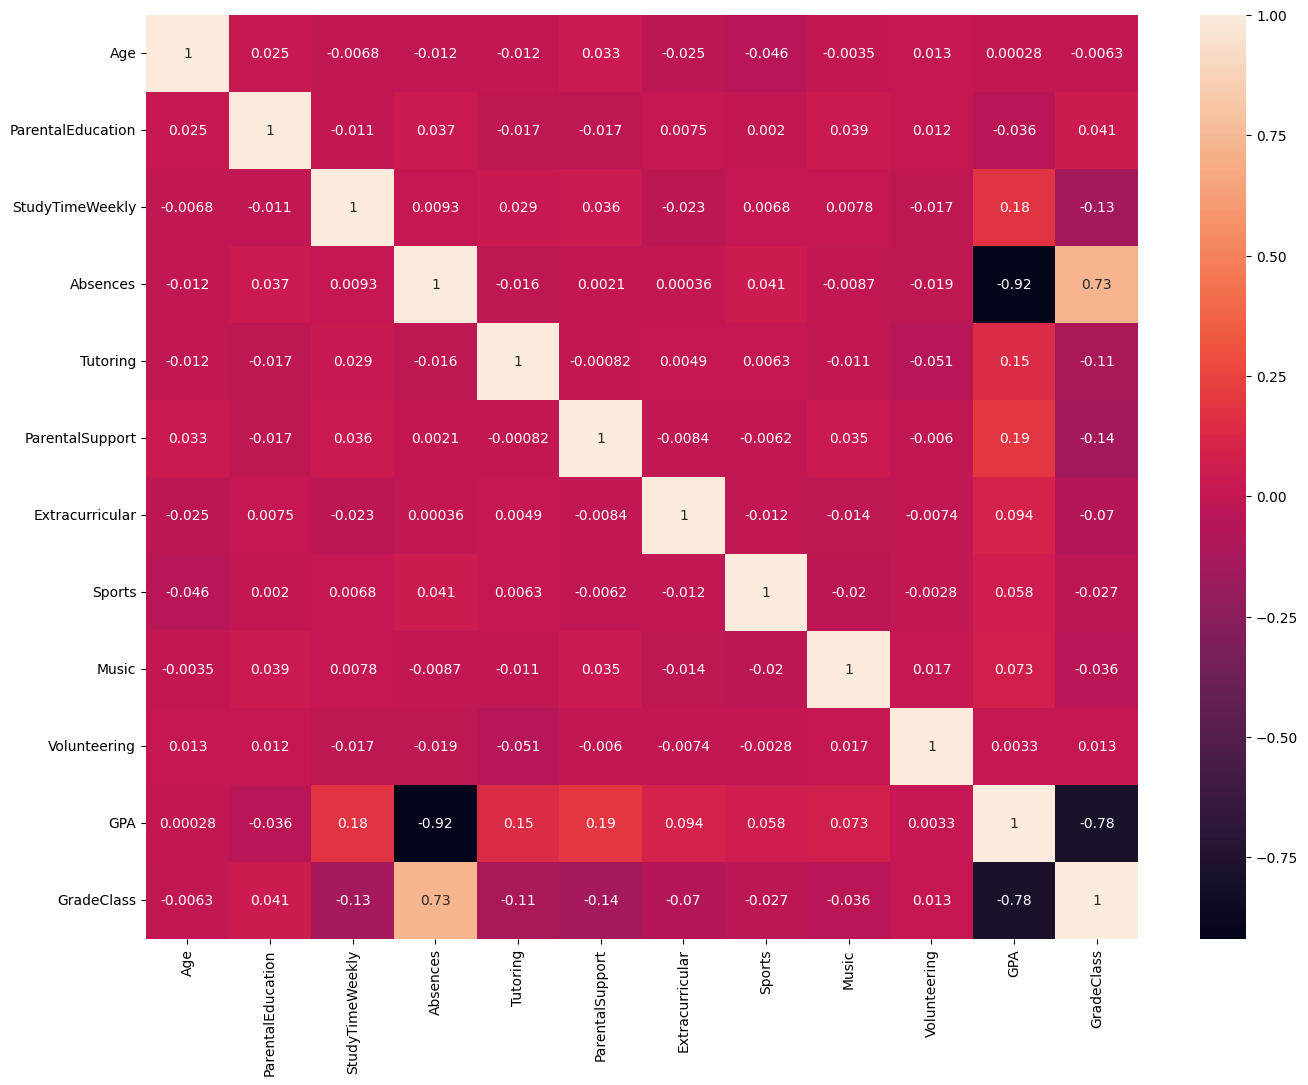

In [10]:
plt.figure(figsize=(16, 12))

corr = df[cols].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)

Abaixo, confirmamos que nas colunas categóricas os dados seguem um padrão, e o contrário para as colunas variadas.

In [11]:
df['Absences'].value_counts().sort_index()

Absences
0     67
1     85
2     69
3     79
4     69
5     83
6     88
7     86
8     91
9     67
10    61
11    71
12    92
13    93
14    84
15    87
16    79
17    81
18    79
19    90
20    90
21    83
22    71
23    86
24    81
25    93
26    80
27    84
28    54
29    69
Name: count, dtype: int64

In [12]:
df['Age'].value_counts()

Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64

In [21]:
df['StudyTimeWeekly'].value_counts().sort_index()

StudyTimeWeekly
0.001057     1
0.004859     1
0.008031     1
0.008206     1
0.014337     1
            ..
19.939810    1
19.948459    1
19.968425    1
19.972346    1
19.978094    1
Name: count, Length: 2392, dtype: int64

In [20]:
df['GradeClass'].value_counts().sort_index()

GradeClass
0.0     107
1.0     269
2.0     391
3.0     414
4.0    1211
Name: count, dtype: int64

In [15]:
df['Extracurricular'].value_counts()

Extracurricular
0    1475
1     917
Name: count, dtype: int64

In [16]:
df['Music'].value_counts()

Music
0    1921
1     471
Name: count, dtype: int64

In [17]:
df['Sports'].value_counts()

Sports
0    1666
1     726
Name: count, dtype: int64

In [18]:
df['ParentalSupport'].value_counts().sort_index()

ParentalSupport
0    212
1    489
2    740
3    697
4    254
Name: count, dtype: int64

In [19]:
df['Tutoring'].value_counts()

Tutoring
0    1671
1     721
Name: count, dtype: int64